In [1]:
import json

with open('all_lyrics_cleaned_v3.json', 'r') as file:
    lyric_data = json.load(file)

"title": "Joy to the World",
<br>
"artist": "Three Dog Night",
<br>
"num_words": 259,
<br>
"num_verses": 10,
<br>
"verses": [],
<br>
"genre": "Rock",
<br>
"length": "3:50",
<br>
"num_unique_words": 75,
<br>
"density": 1.126086956521739,
<br>
"similar_verses_score": 16.465079365079365

In [2]:
import pandas as pd
import math

def length_in_seconds(length):
    if length == '0':
        return 180
    else:
        colon = length.find(':')
        mins = length[0:colon]
        seconds = length[colon+1:]
        return (int(mins) * 60 + int(seconds))

df = pd.DataFrame()
lst = []
for year in range(1960, 2019):
    for song in lyric_data[str(year)]:
        song['year'] = year
        if not song.get('genre'):
            song['genre'] = 'Other'
        if song.get('length'):
            song['length'] = length_in_seconds(song['length'])
        
        # calculate the complexity score here
        complexity = (song['num_words'] + song['num_verses'] + song['length'] + song['num_unique_words'] + song['density']) - (song['similar_verses_score'] + 1)
#         complexity = 10 * (song['num_verses'] + song['num_unique_words'] + song['density']) - (song['similar_verses_score'] + 1)
        log_complexity = math.log(abs(complexity))
        song['complexity'] = complexity
        song['log_complexity'] = log_complexity
        line = pd.DataFrame.from_records([song])
        lst.append(line)

# df = pd.DataFrame.from_dict([lyric_data])
df = pd.concat(lst, ignore_index=True)

df['length'] = df['length'].astype('float64')
df['num_verses'] = df['num_verses'].astype('float64')
df['num_words'] = df['num_words'].astype('float64')
df['year'] = df['year'].astype('float64')
df['num_unique_words'] = df['num_unique_words'].astype('float64')
df['density'] = df['density'].astype('float64')
df['similar_verses_score'] = df['similar_verses_score'].astype('float64')

df['complexity'] = df['complexity'].astype('float64')
df['log_complexity'] = df['log_complexity'].astype('float64')

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

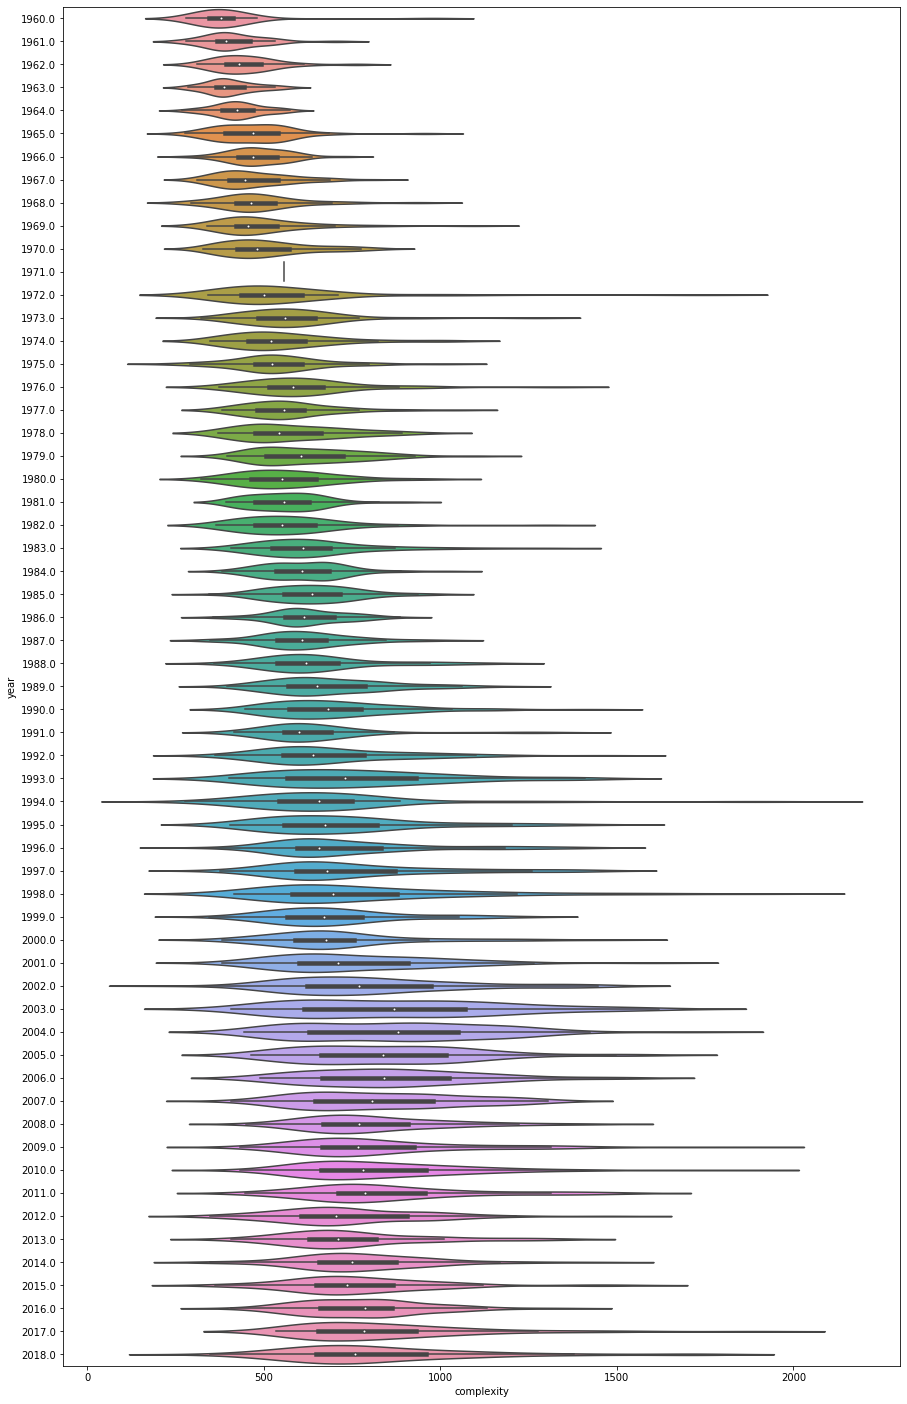

In [4]:
plt.figure(figsize=(15, 25))

#plotting the complexity score
sns.violinplot(data=df, x='complexity', y='year', scale='width', orient='h')

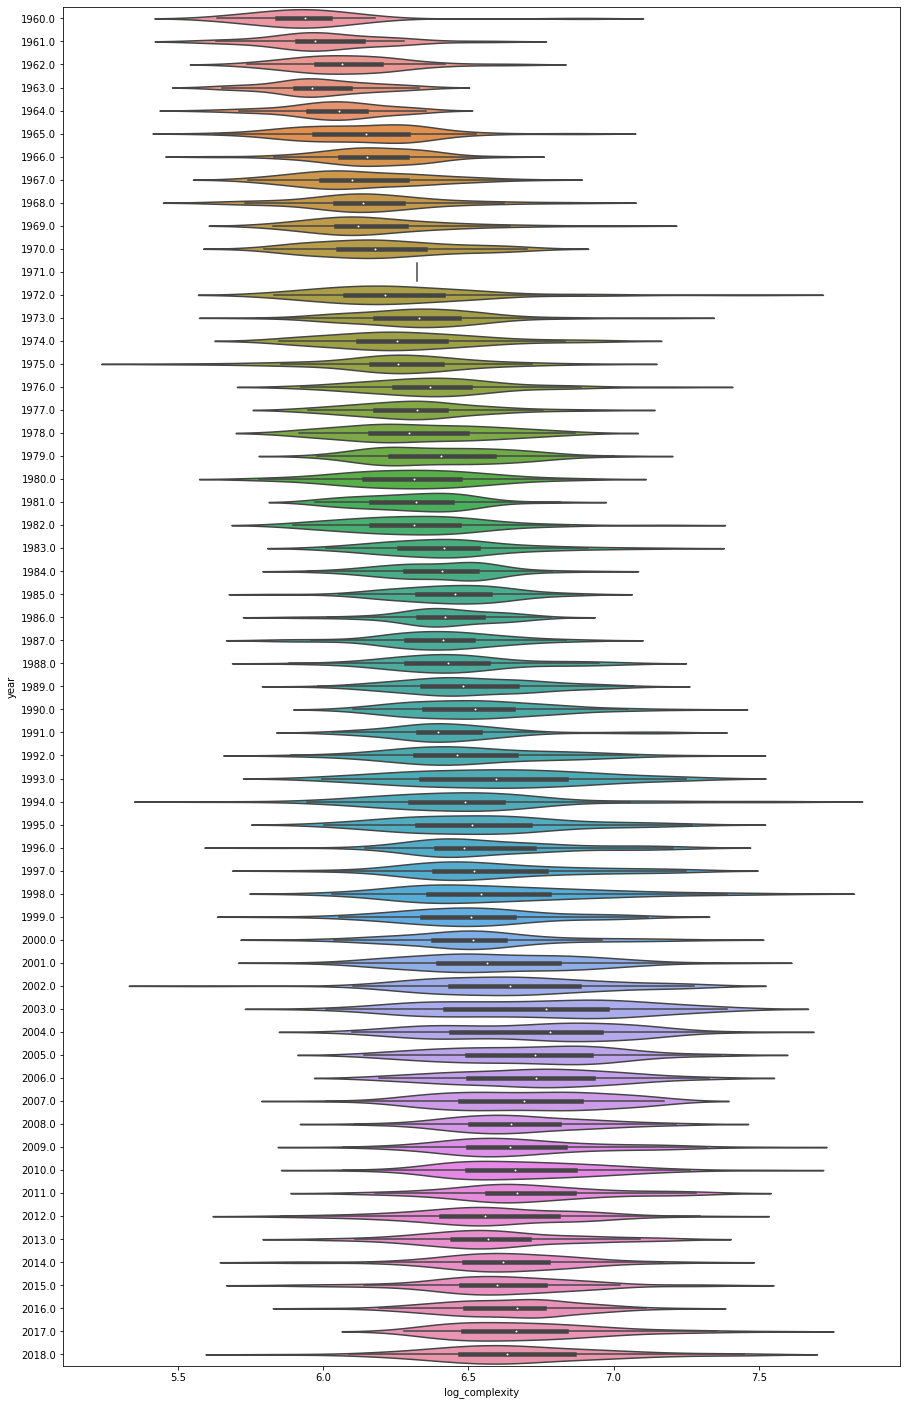

In [5]:
plt.figure(figsize=(15, 25))

#plotting the complexity score
sns.violinplot(data=df, x='log_complexity', y='year', scale='width', orient='h')

Text(0, 0.5, 'Average Complexity')

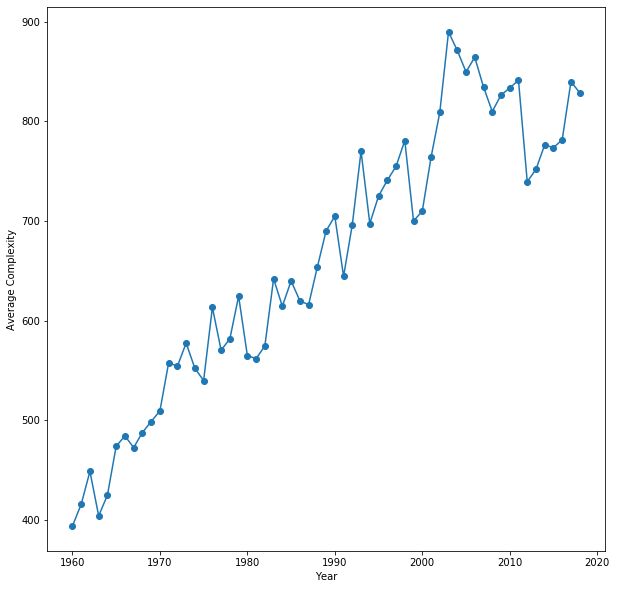

In [6]:
plt.figure(figsize=(10, 10))

avg_df = pd.DataFrame(columns=['year', 'complexity'])

for year in range(1960, 2019):
# for year in range(2005, 2015):
    year_avg = 0
    for song in lyric_data[str(year)]:
        year_avg += song['complexity']
    year_avg = year_avg / len(lyric_data[str(year)])
    avg_df = avg_df.append({'year': year, 'complexity':year_avg}, ignore_index=True)

#plotting the average complexity per year
plt.plot(avg_df['year'], avg_df['complexity'], marker='o')
plt.xlabel('Year')
plt.ylabel('Average Complexity')

Text(0.5, 1.0, 'Average Song Complexity 2005-2014')

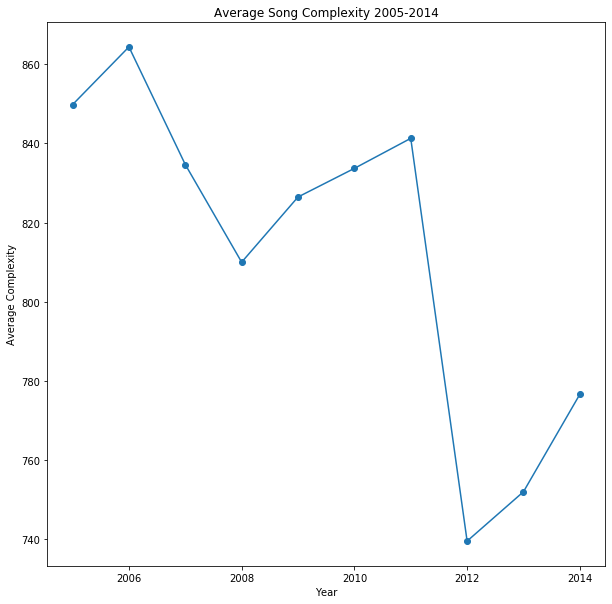

In [7]:
plt.figure(figsize=(10, 10))

avg_df = pd.DataFrame(columns=['year', 'complexity'])

for year in range(2005, 2015):
    year_avg = 0
    for song in lyric_data[str(year)]:
        year_avg += song['complexity']
    year_avg = year_avg / len(lyric_data[str(year)])
    avg_df = avg_df.append({'year': year, 'complexity':year_avg}, ignore_index=True)

#plotting the average complexity per year
plt.plot(avg_df['year'], avg_df['complexity'], marker='o')
plt.xlabel('Year')
plt.ylabel('Average Complexity')
plt.title('Average Song Complexity 2005-2014')

Text(0.5, 1.0, "# Unique Words Distribution 1960's and 2010's")

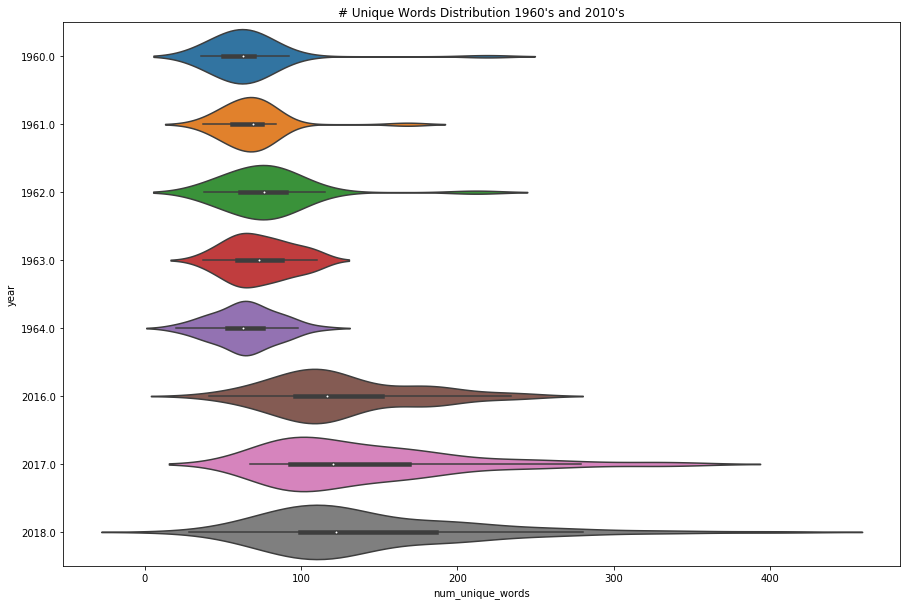

In [8]:
plt.figure(figsize=(15, 10))

first_decade = df.loc[df['year'] < 1965]
last_decade = df.loc[df['year'] > 2015]

frames = [first_decade, last_decade]
decades = pd.concat(frames)

sns_plot = sns.violinplot(data=decades, x='num_unique_words', y='year', scale='width', orient='h')
sns_plot.set_title("# Unique Words Distribution 1960's and 2010's")

# sns_plot.figure.savefig("first_last_decades.png")

Text(0.5, 1.0, "Complexity Distribution 1960's and 2010's")

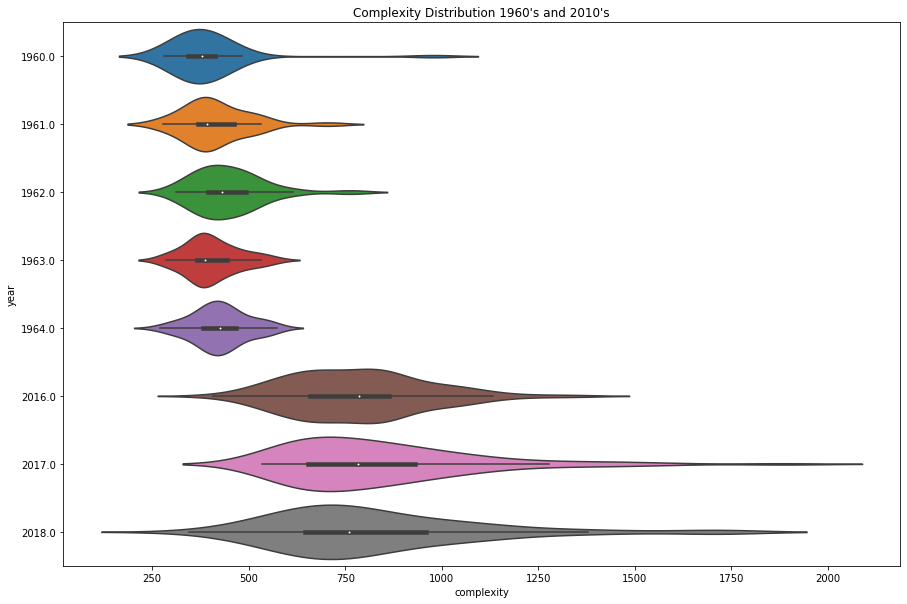

In [9]:
plt.figure(figsize=(15, 10))

first_decade = df.loc[df['year'] < 1965]
last_decade = df.loc[df['year'] > 2015]

frames = [first_decade, last_decade]
decades = pd.concat(frames)

sns_plot = sns.violinplot(data=decades, x='complexity', y='year', scale='width', orient='h')
sns_plot.set_title("Complexity Distribution 1960's and 2010's")

# sns_plot.figure.savefig("first_last_decades.png")